In [85]:
# IMPORT NECESSARY MODULES
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [4]:
# LOAD DATASET
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, names=col_names)

In [5]:
# DATASET SAMPLE
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# EDA
display(df.shape)
display(df.info())
display(df.describe())

(150, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


None

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# CHECK FOR DUPLICATES
df.duplicated().value_counts()

False    147
True       3
dtype: int64

In [55]:
# DROP DUPLICATES
df.drop_duplicates(inplace=True)
display(df.duplicated().value_counts())

False    147
dtype: int64

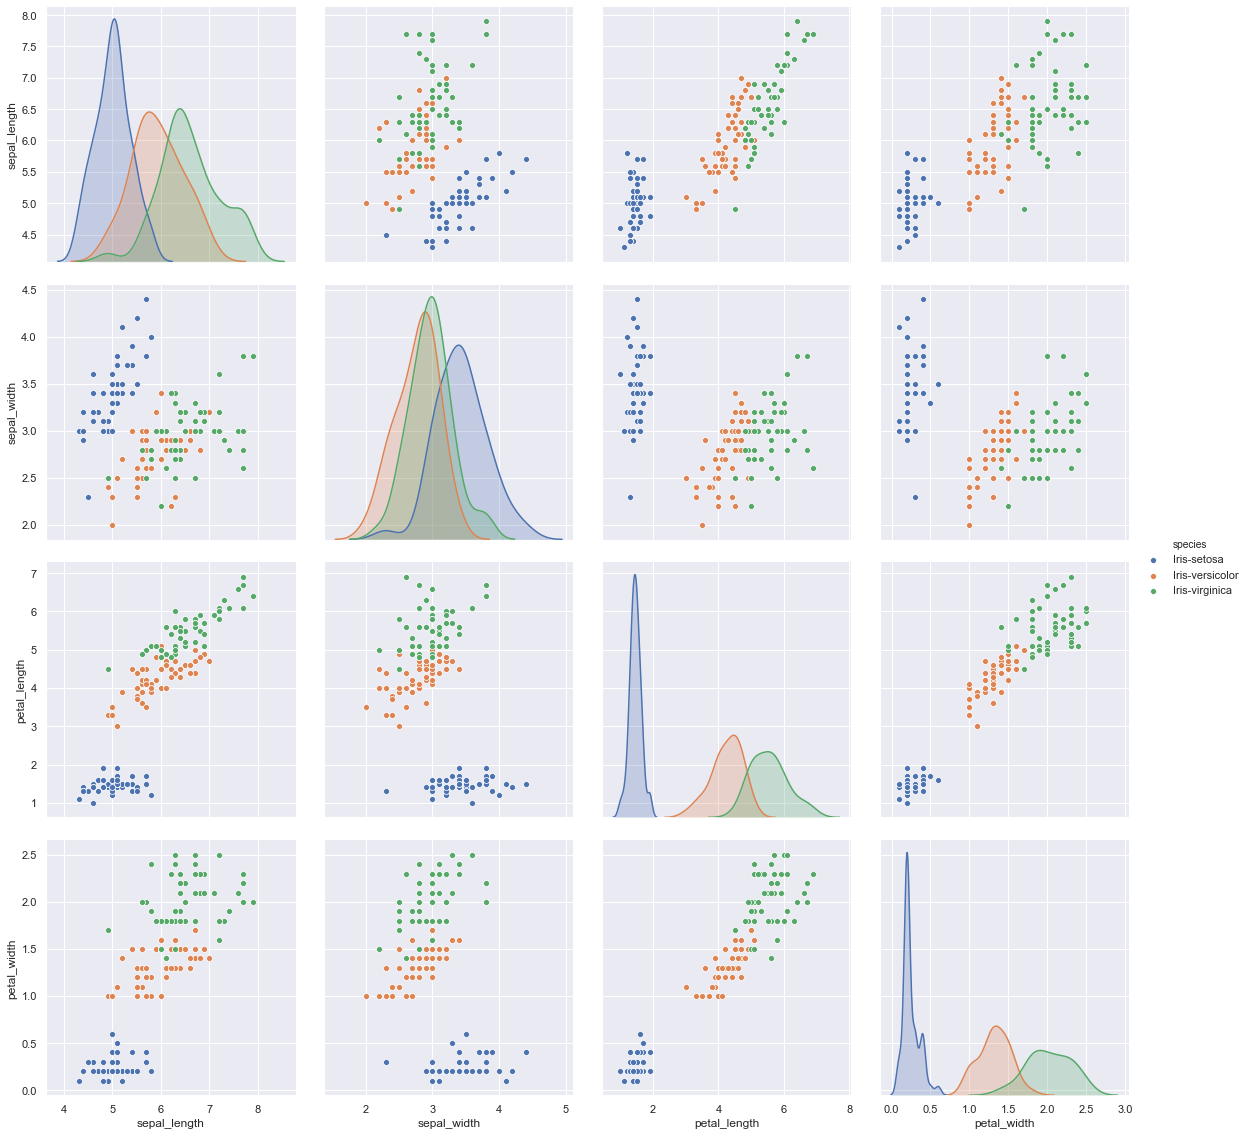

In [57]:
# VISUALISE THE DATASET
sns.pairplot(df, hue="species", height = 4);

In [84]:
# ONE HOT ENCODE THE TARGET
encoded_df = pd.get_dummies(df,'species')
encoded_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [24]:
# SPLIT THE DATASET
X = encoded_df.drop(['species_Iris-setosa','species_Iris-versicolor','species_Iris-virginica'], axis=1)
Y = encoded_df[['species_Iris-setosa','species_Iris-versicolor','species_Iris-virginica']]
display(X.head())
display(Y.head())

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [28]:
#Split data into train and test set. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(102, 4)

(102, 3)

(45, 4)

(45, 3)

## CLASSIFICATION

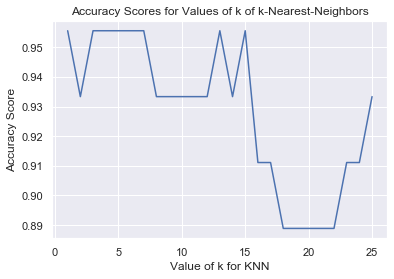

In [38]:
# MULTI-CLASS CLASSIFICATION
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred1 = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred1))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [39]:
# BINARY CLASSIFICATION
# USING SETOSA AS THE TARGET VARIABLE
new_y_train = y_train['species_Iris-setosa']
new_y_test = y_test['species_Iris-setosa']
display(new_y_test.shape, new_y_train.shape)

(45,)

(102,)

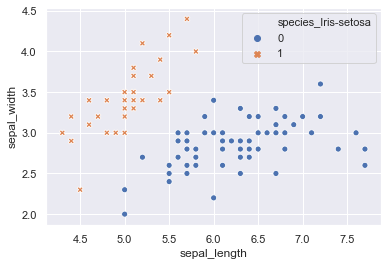

In [71]:
# VISUALISE TARGET VARIABLE USING ANY RANDOM FEATURE FROM TRAINING SET
# CHOOSING SEPAL LENGTH AGAINST SEPAL WIDTH
sns.scatterplot(data=pd.concat([X_train, new_y_train], axis=1), x="sepal_length", y="sepal_width",
                hue="species_Iris-setosa", style="species_Iris-setosa")


In [87]:
logreg = LogisticRegression()
logreg.fit(X_train, new_y_train)
y_pred2 = logreg.predict(X_test)

# how model performs on training data
print(logreg.score(X_train, new_y_train))
# how model performs on test data
print(accuracy_score(new_y_test, y_pred2))
print(y_pred2)

1.0
1.0
[0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0
 0 1 1 1 0 0 0 0]


In [89]:
# MODEL EVALUATION
labels = ['Iris-setosa', 'Others']
matrix = confusion_matrix(new_y_test, y_pred2)
matrix

array([[28,  0],
       [ 0, 17]])

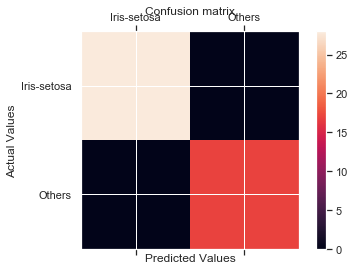

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Resampling

In [86]:
# cross validation
# using knn
knn = KNeighborsClassifier(n_neighbors=2)
# cross validation
scores=cross_val_score(knn, X_train, y_train, cv=5)

print(scores)
print(np.mean(scores))

[0.9047619 1.        0.85      1.        0.9      ]
0.930952380952381
